In [57]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [58]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [59]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [60]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import numpy as np
import scipy as sp
import datetime as dt
import netCDF4 as nc
import pickle
import cmocean as cm
import glob

%matplotlib inline

# MB (Mass Balance): Visualizing differences in the mass balance of the 3 runs, by layer

In [61]:
#for all plots in nb, some plot specs

lw = 2
fs = 20
tcm = cm.cm.deep
fact = 0.7

In [62]:
#load DIC calculated mass balances, ie means and sums per layer per day 
car_suffix = '_dissolved_inorganic_carbon_means_perday_alg2.pkl'
car_suffix_sum = '_dissolved_inorganic_carbon_sums_perday_alg2.pkl'


BR2 = 'BR_2nd_2015'; LA3 = 'PI_3rd_2015'; PI3 = 'PI_ACBC_2015_3'
LA3rr = 'LA3'
PI3rr = 'PI3'

BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR2_var_sum = pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA3_var_sum = pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))

#depending if local or not
#mesh = nc.Dataset('/Users/terezajana/local_python/mesh_mask201702.nc')
#bath = nc.Dataset('/Users/terezajana/local_python/bathymetry_201702.nc')
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('//data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

csize = pickle.load(open('./pickles/cellsize_alg2.pkl', 'rb'))


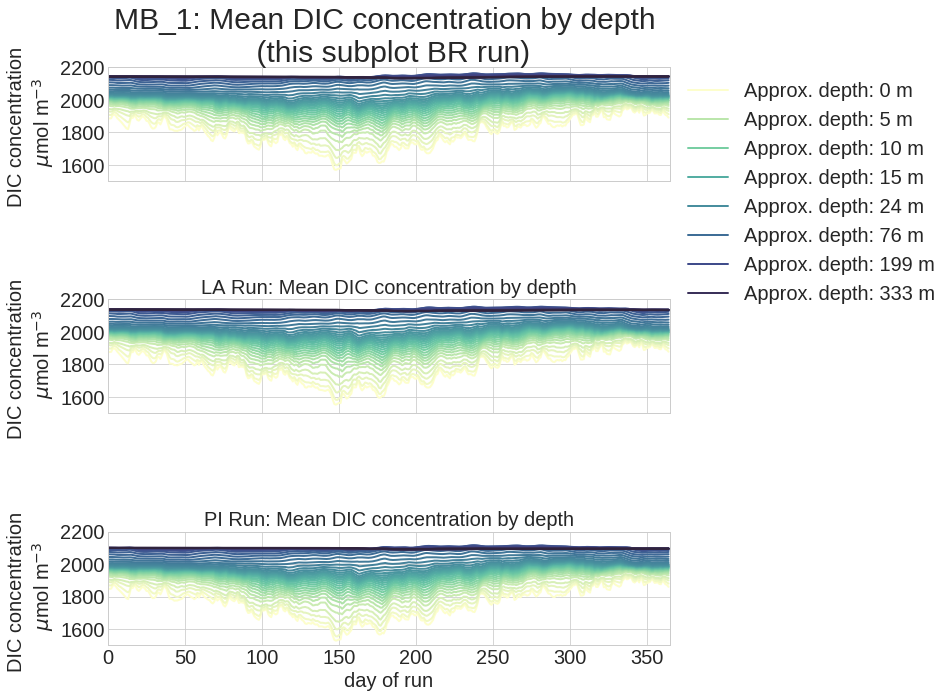

In [63]:
depth = mesh['gdept_1d'][:]
ymin = 1500
ymax = 2200

fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(3,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC concentration \n $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_1: Mean DIC concentration by depth \n (this subplot BR run)', fontsize = 30 )

#LA
ax = fig.add_subplot(3,1,2)

for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC concentration \n $\mu$mol m$^{-3}$', fontsize = fs)
plt.title('LA Run: Mean DIC concentration by depth', fontsize = fs )

#PI
ax = fig.add_subplot(3,1,3)

for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365])
plt.ylim([ymin,ymax])
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC concentration \n $\mu$mol m$^{-3}$', fontsize = fs)
plt.title('PI Run: Mean DIC concentration by depth', fontsize = fs )
plt.xlabel('day of run', fontsize = fs)
plt.tight_layout()


Text(0.5, 1.0, 'BR Run - PI Run : Mean DIC concentration difference, by depth')

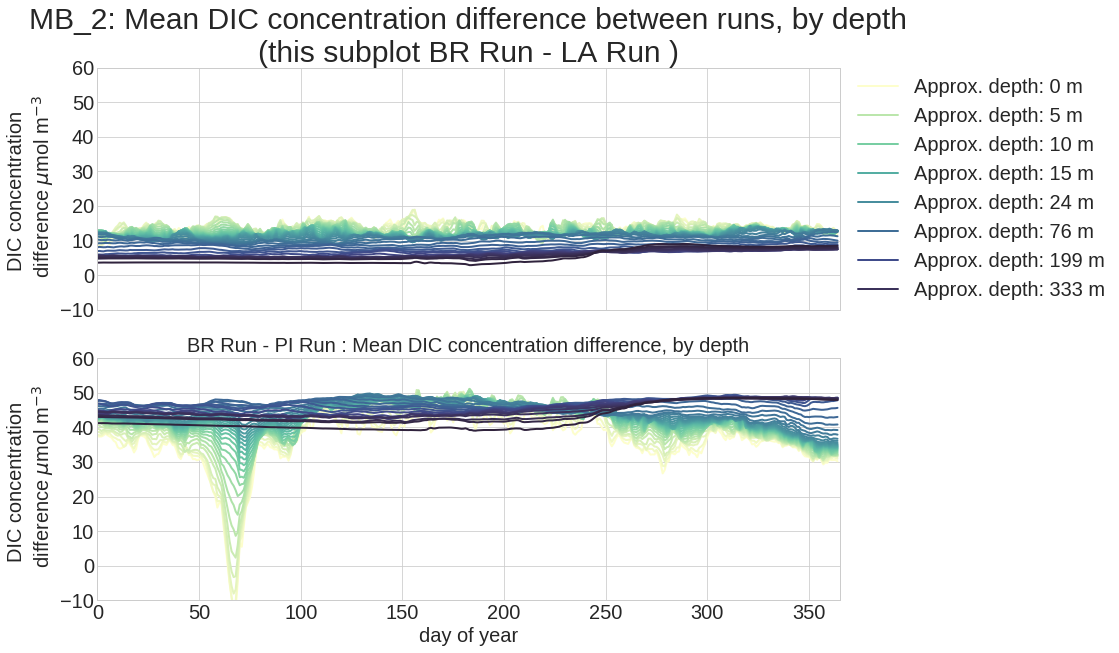

In [64]:
ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:]-LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:]-LA3_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_2: Mean DIC concentration difference between runs, by depth\
\n(this subplot BR Run - LA Run )', fontsize = 30 )

#LA
ax = fig.add_subplot(2,1,2)

for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,BR2_var[i,:]-PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365])
plt.ylim([ymin,ymax])
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
ax.set_xlabel('day of year', fontsize = fs)
ax.set_ylabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
plt.title('BR Run - PI Run : Mean DIC concentration difference, by depth', fontsize = fs )



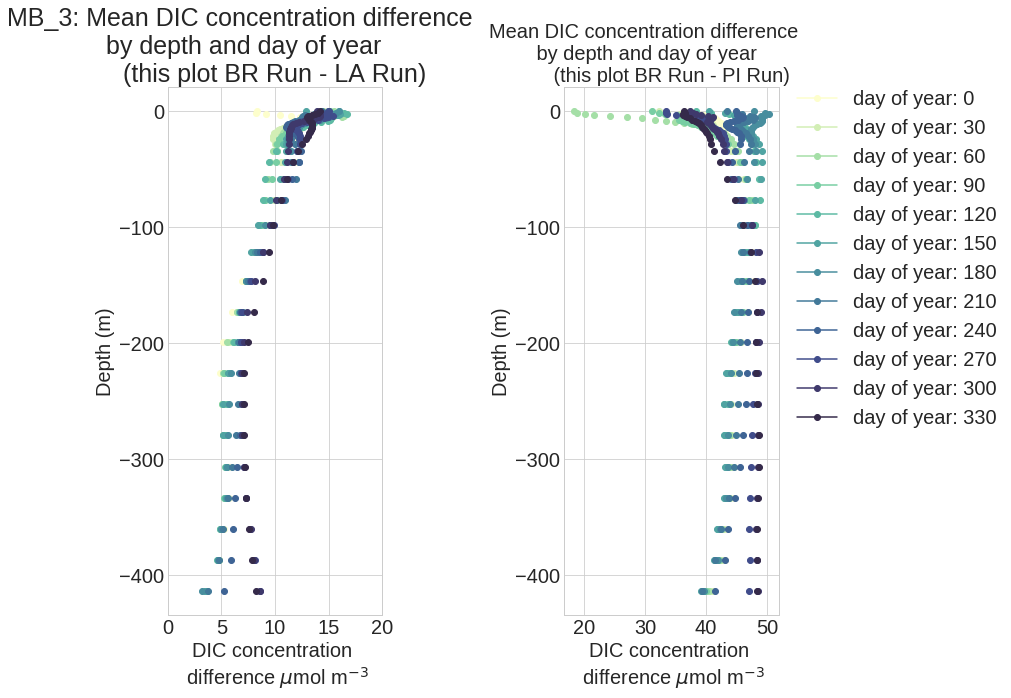

In [65]:
ymin = -10
ymax = 60


fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,2,1)

for d in range(0,12):
    for i in range(0,40):
        zdepth = (depth[0,i])  
        if i == 0:
            ax.plot((BR2_var[i,d*30]-LA3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax.plot((BR2_var[i,d*30]-LA3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlim([0,20])
ax.set_ylabel('Depth (m)', fontsize = fs)
ax.set_xlabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
#ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_3: Mean DIC concentration difference\
          \n by depth and day of year\
          \n (this plot BR Run - LA Run) ', fontsize = 25 )

plt.yticks(fontsize=fs)
#PI
ax = fig.add_subplot(1,2,2)

for d in range(0,12):
    for i in range(0,40):
        zdepth = (depth[0,i]) 
        if i == 0:
            ax.plot((BR2_var[i,d*30]-PI3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax.plot((BR2_var[i,d*30]-PI3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o')


plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_ylabel('Depth (m)', fontsize = fs)
ax.set_xlabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Mean DIC concentration difference\
          \n by depth and day of year\
          \n (this plot BR Run - PI Run) ', fontsize = fs )




plt.tight_layout()

Text(0, 0.5, 'depth (m)')

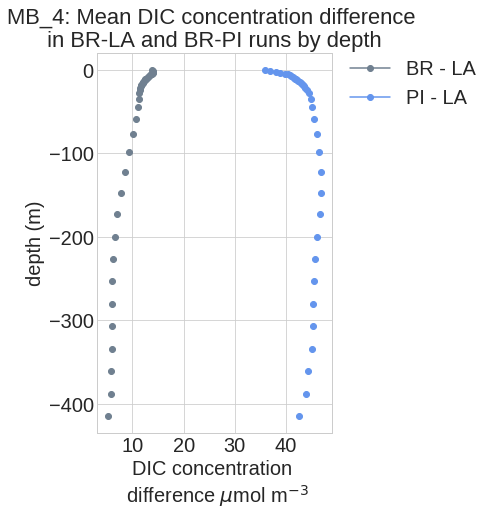

In [66]:
fig = plt.figure(figsize=(6*fact,10*fact))
days_in = np.arange(0,365,1)

ax = fig.add_subplot(1,1,1)


for i in range(0,40):
    zdepth = (depth[0,i])
    if i == 0:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'BR - LA')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])), -zdepth,\
                color = 'cornflowerblue', marker = 'o', label = 'PI - LA')
    else:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, color = 'slategrey', marker = 'o')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])),-zdepth,color = 'cornflowerblue', marker = 'o')

ax.set_xlabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_4: Mean DIC concentration difference \n in BR-LA and BR-PI runs \
by depth ', fontsize = fs+2 )
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_ylabel('depth (m)', fontsize = 20)

Text(0, 0.5, 'depth (m)')

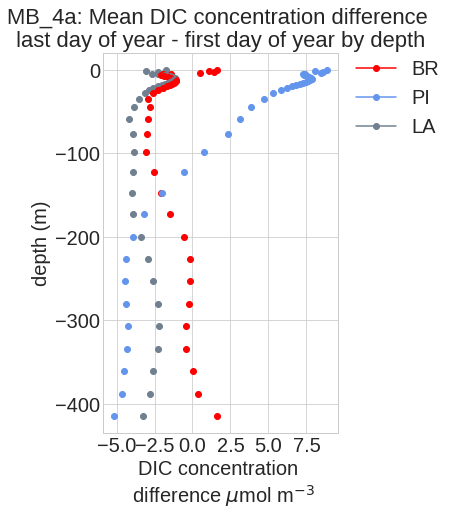

In [67]:
fig = plt.figure(figsize=(6*fact,10*fact))
days_in = np.arange(0,365,1)
de = 364
ds = 0
ax = fig.add_subplot(1,1,1)


for i in range(0,40):
    zdepth = (depth[0,i])  
    if i == 0:
        ax.plot((BR2_var[i,de]-BR2_var[i,ds]),-zdepth, \
                color = 'red', marker = 'o', label = 'BR')
        ax.plot((PI3_var[i,de]-PI3_var[i,ds]),-zdepth, \
                color = 'cornflowerblue', marker = 'o', label = 'PI')
        ax.plot((LA3_var[i,de]-LA3_var[i,ds]),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'LA')
    else:
        ax.plot((BR2_var[i,de]-BR2_var[i,ds]),-zdepth, \
                color = 'red', marker = 'o')
        ax.plot((PI3_var[i,de]-PI3_var[i,ds]),-zdepth, \
                color = 'cornflowerblue', marker = 'o')
        ax.plot((LA3_var[i,de]-LA3_var[i,ds]),-zdepth, \
                color = 'slategrey', marker = 'o')
        
ax.set_xlabel('DIC concentration \n difference $\mu$mol m$^{-3}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_4a: Mean DIC concentration difference \n last day of year - first day of year \
by depth ', fontsize = fs+2 )
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_ylabel('depth (m)', fontsize = 20)

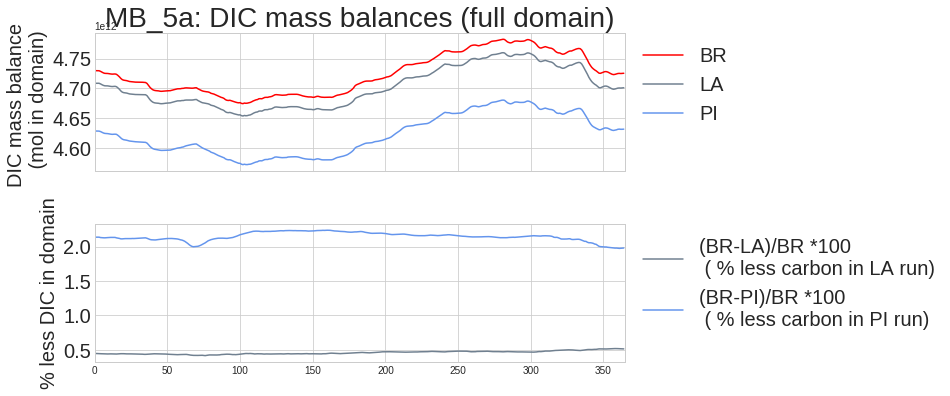

In [68]:
depth = mesh['gdept_1d'][:]
ymin = 1500
ymax = 2200

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

#sum domain totals, divide by 1000 to put it into mols
BR_tot = np.nansum(BR2_var_sum[:,:],axis = 0)*(1/1000)
LA_tot = np.nansum(LA3_var_sum[:,:],axis = 0)*(1/1000)
PI_tot = np.nansum(PI3_var_sum[:,:],axis = 0)*(1/1000)

ax.plot(days_in,BR_tot,color = 'red', label = 'BR')
ax.plot(days_in,LA_tot,color = 'slategrey', label = 'LA')
ax.plot(days_in,PI_tot,color = 'cornflowerblue', label = 'PI')
plt.xlim([0,365])
#plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC mass balance \n (mol in domain)', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_5a: DIC mass balances (full domain)', fontsize = 28 )


ax = fig.add_subplot(2,1,2)

ax.plot(days_in, ((BR_tot-LA_tot)/BR_tot)*100,color = 'slategrey', \
        label = '(BR-LA)/BR *100 \n ( % less carbon in LA run)')
ax.plot(days_in, ((BR_tot-PI_tot)/BR_tot)*100,color = 'cornflowerblue', \
        label = '(BR-PI)/BR *100 \n ( % less carbon in PI run)')

plt.xlim([0,365])

#plt.ylim([ymin,ymax])
#ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('% less DIC in domain', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


plt.tight_layout()


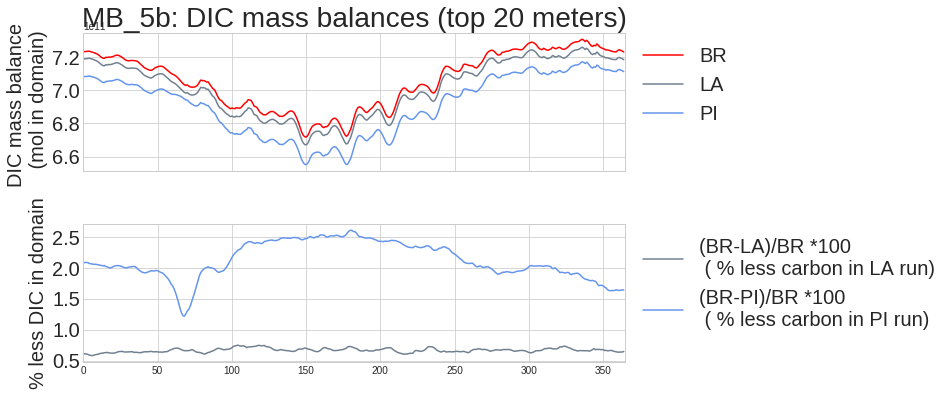

In [69]:
depth = mesh['gdept_1d'][:]
ymin = 1500
ymax = 2200

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

#sum domain totals, divide by 1000 to put it into mols
BR_tot = np.nansum(BR2_var_sum[0:20,:],axis = 0)*(1/1000)
LA_tot = np.nansum(LA3_var_sum[0:20,:],axis = 0)*(1/1000)
PI_tot = np.nansum(PI3_var_sum[0:20,:],axis = 0)*(1/1000)

ax.plot(days_in,BR_tot,color = 'red', label = 'BR')
ax.plot(days_in,LA_tot,color = 'slategrey', label = 'LA')
ax.plot(days_in,PI_tot,color = 'cornflowerblue', label = 'PI')
plt.xlim([0,365])
#plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC mass balance \n (mol in domain)', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_5b: DIC mass balances (top 20 meters)', fontsize = 28 )


ax = fig.add_subplot(2,1,2)

ax.plot(days_in, ((BR_tot-LA_tot)/BR_tot)*100,color = 'slategrey', \
        label = '(BR-LA)/BR *100 \n ( % less carbon in LA run)')
ax.plot(days_in, ((BR_tot-PI_tot)/BR_tot)*100,color = 'cornflowerblue', \
        label = '(BR-PI)/BR *100 \n ( % less carbon in PI run)')

plt.xlim([0,365])

#plt.ylim([ymin,ymax])
#ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('% less DIC in domain', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


plt.tight_layout()


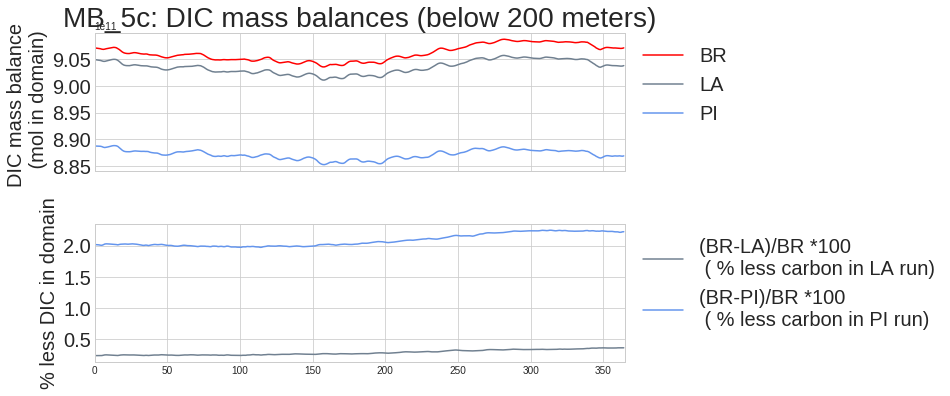

In [70]:
depth = mesh['gdept_1d'][:]
ymin = 1500
ymax = 2200

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

#sum domain totals, divide by 1000 to put it into mols
BR_tot = np.nansum(BR2_var_sum[30:39,:],axis = 0)*(1/1000)
LA_tot = np.nansum(LA3_var_sum[30:39,:],axis = 0)*(1/1000)
PI_tot = np.nansum(PI3_var_sum[30:39,:],axis = 0)*(1/1000)

ax.plot(days_in,BR_tot,color = 'red', label = 'BR')
ax.plot(days_in,LA_tot,color = 'slategrey', label = 'LA')
ax.plot(days_in,PI_tot,color = 'cornflowerblue', label = 'PI')
plt.xlim([0,365])
#plt.ylim([ymin,ymax])
ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('DIC mass balance \n (mol in domain)', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('MB_5c: DIC mass balances (below 200 meters)', fontsize = 28 )


ax = fig.add_subplot(2,1,2)

ax.plot(days_in, ((BR_tot-LA_tot)/BR_tot)*100,color = 'slategrey', \
        label = '(BR-LA)/BR *100 \n ( % less carbon in LA run)')
ax.plot(days_in, ((BR_tot-PI_tot)/BR_tot)*100,color = 'cornflowerblue', \
        label = '(BR-PI)/BR *100 \n ( % less carbon in PI run)')

plt.xlim([0,365])

#plt.ylim([ymin,ymax])
#ax.set_xticklabels([])
plt.yticks(fontsize = fs)
ax.set_ylabel('% less DIC in domain', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


plt.tight_layout()


# JDF (JDF lateral flux) - convention - positive is into domain

In [71]:
car_suffix = '_DIC_UT_JDFfluxmean_perday_alg2.pkl'
car_suffix_sum = '_DIC_UT_JDFfluxsum_perday_alg2.pkl'
BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR2_var_sum = pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA3_var_sum = pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))



(array([-60000., -40000., -20000.,      0.,  20000.,  40000.,  60000.]),
 <a list of 7 Text yticklabel objects>)

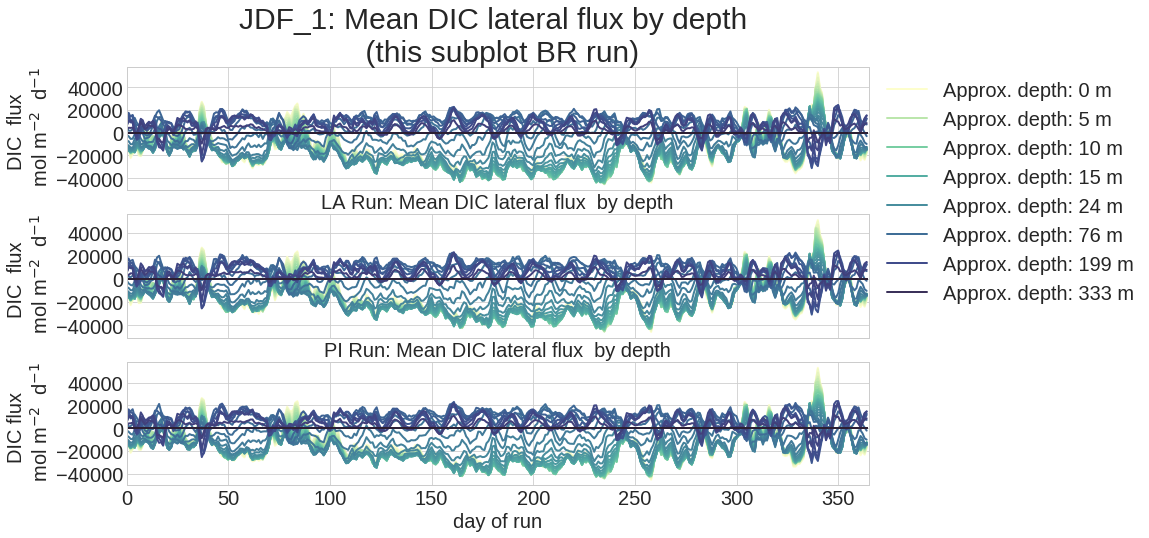

In [72]:
depth = mesh['gdept_1d'][:]
fig = plt.figure(figsize=(19*fact,11*fact))
days_in = np.arange(0,365,1)
fs = 20

#BR
ax = fig.add_subplot(3,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('DIC  flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('JDF_1: Mean DIC lateral flux by depth \n (this subplot BR run)', fontsize = 30 )
plt.yticks(fontsize = fs)

#LA
ax = fig.add_subplot(3,1,2)
for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('DIC  flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
plt.title('LA Run: Mean DIC lateral flux  by depth', fontsize = fs )
plt.yticks(fontsize = fs)

#PI
ax = fig.add_subplot(3,1,3)
for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
plt.xlim([0,365])
ax.set_ylabel('DIC flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
plt.title('PI Run: Mean DIC lateral flux  by depth', fontsize = fs )
plt.xlabel('day of run', fontsize = fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
#plt.tight_layout()


Text(0.5, 1.0, 'BR Run - PI Run : Mean DIC lateral flux difference, by depth')

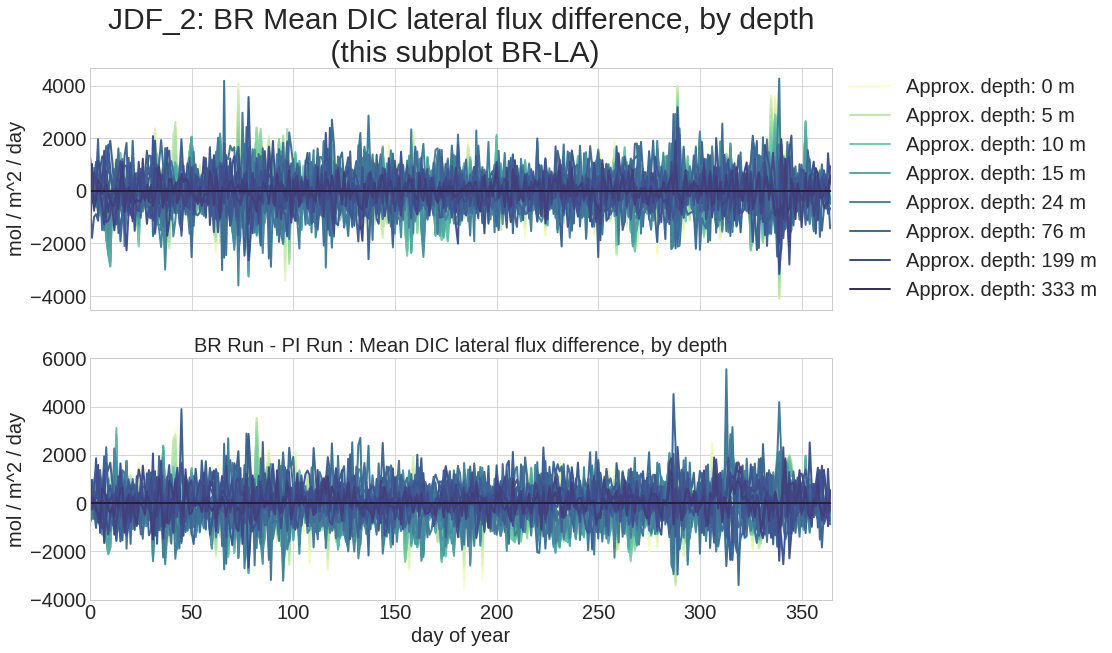

In [73]:
ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:]-LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:]-LA3_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
plt.yticks(fontsize = fs)
ax.set_xticklabels([])
ax.set_ylabel('mol / m^2 / day', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('JDF_2: BR Mean DIC lateral flux difference, by depth\
\n (this subplot BR-LA)', fontsize = 30 )

#LA
ax = fig.add_subplot(2,1,2)
for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,BR2_var[i,:]-PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365])
plt.yticks(fontsize = fs)
plt.xticks(fontsize = fs)
ax.set_xlabel('day of year', fontsize = fs)
ax.set_ylabel('mol / m^2 / day', fontsize = fs)
plt.title('BR Run - PI Run : Mean DIC lateral flux difference, by depth', fontsize = fs )


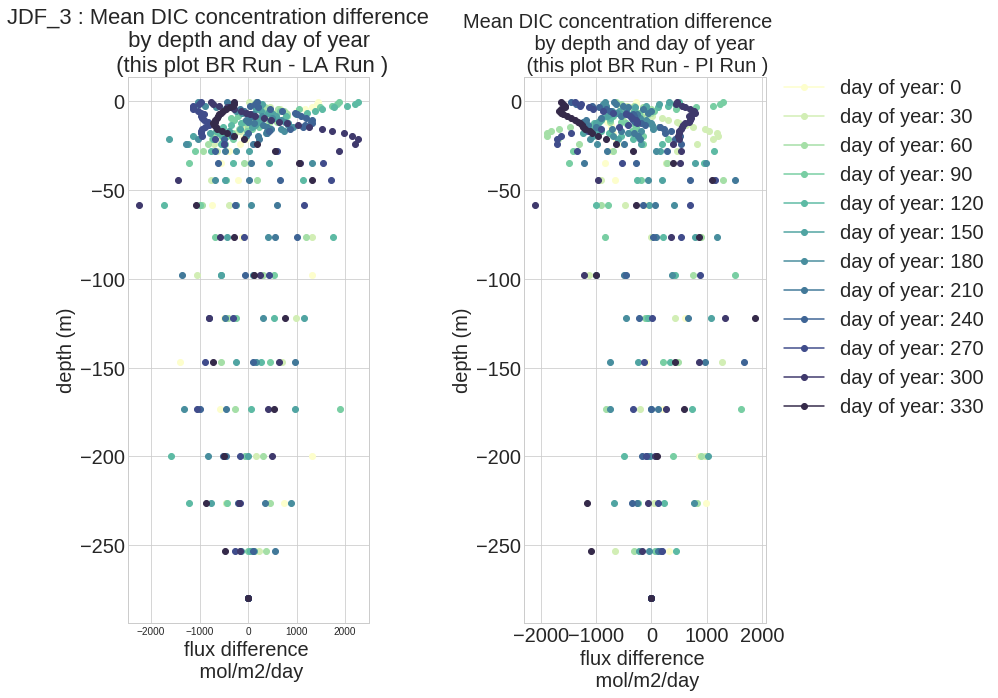

In [74]:
#####Plot
ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,2,1)

for d in range(0,12):
    for i in range(0,34):
        zdepth = (depth[0,i])  
        if i == 0:
            ax.plot((BR2_var[i,d*30]-LA3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax.plot((BR2_var[i,d*30]-LA3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

ax.set_ylabel('depth (m)', fontsize = fs)
ax.set_xlabel('flux difference \n mol/m2/day', fontsize = fs)
plt.title('JDF_3 : Mean DIC concentration difference\
          \n by depth and day of year \n (this plot BR Run - LA Run )', fontsize = fs+2 )

plt.yticks(fontsize=fs)
#PI
ax = fig.add_subplot(1,2,2)

for d in range(0,12):
    for i in range(0,34):
        zdepth = (depth[0,i])  
        if i == 0:
            ax.plot((BR2_var[i,d*30]-PI3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax.plot((BR2_var[i,d*30]-PI3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.set_xlabel('flux difference \n mol/m2/day', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
ax.set_ylabel('depth (m)', fontsize = fs)
plt.title('Mean DIC concentration difference\
          \n by depth and day of year \n (this plot BR Run - PI Run )', fontsize = fs)
plt.tight_layout()

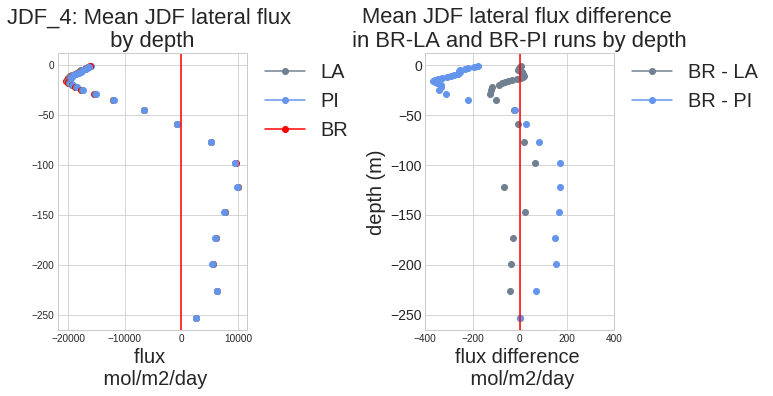

In [75]:




#####
ymin = -10
ymax = 60

fig = plt.figure(figsize=(15*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,2,1)
for i in range(0,33):
    zdepth = (depth[0,i])  
    if i == 0:
        ax.plot(np.mean((LA3_var[i,:])),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'LA')
        ax.plot(np.mean((PI3_var[i,:])), -zdepth, \
                color = 'cornflowerblue', marker = 'o', label = 'PI')
        ax.plot(np.mean((BR2_var[i,:])), -zdepth, \
                color = 'red', marker = 'o', label = 'BR')
    else:
        ax.plot(np.mean((BR2_var[i,:])),-zdepth, color = 'red', marker = 'o')
        ax.plot(np.mean((LA3_var[i,:])),-zdepth, color = 'slategrey', marker = 'o')
        ax.plot(np.mean((PI3_var[i,:])),-zdepth, color = 'cornflowerblue', marker = 'o')
        
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.axvline(x=0,color = 'r')
plt.title('JDF_4: Mean JDF lateral flux \n \
by depth ', fontsize = fs+2 )
ax.set_xlabel('flux \n mol/m2/day', fontsize = fs)

ax = fig.add_subplot(1,2,2)



for i in range(0,33):
    zdepth = (depth[0,i])  
    if i == 0:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'BR - LA')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])), -zdepth, \
                color = 'cornflowerblue', marker = 'o', label = 'BR - PI')
    else:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, color = 'slategrey', marker = 'o')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])),-zdepth, color = 'cornflowerblue', marker = 'o')

ax.set_xlabel('flux difference \n mol/m2/day', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Mean JDF lateral flux difference \n in BR-LA and BR-PI runs \
by depth ', fontsize = fs+2 )
#plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel('depth (m)', fontsize = 20)
plt.xlim(-400,400)
plt.axvline(x=0,color = 'r')
plt.tight_layout()




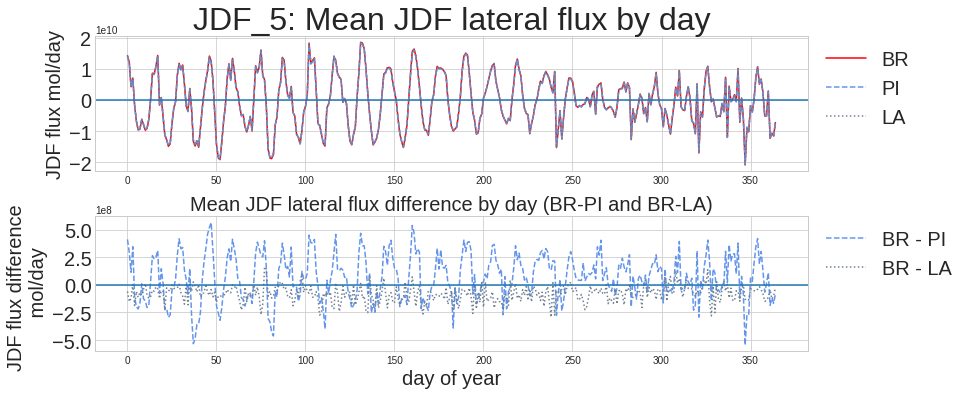

In [76]:
#####plot
#####
#####
BR2_fullcol_sum = np.sum(BR2_var_sum, axis = 0)
PI3_fullcol_sum = np.sum(PI3_var_sum, axis = 0)
LA3_fullcol_sum = np.sum(LA3_var_sum, axis = 0)

ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

ax.plot(BR2_fullcol_sum, color = 'red', label = 'BR')
ax.plot(PI3_fullcol_sum, color = 'cornflowerblue', linestyle = '--', label = 'PI')
ax.plot(LA3_fullcol_sum, color = 'slategrey', linestyle = ':', label = 'LA')
plt.title('JDF_5: Mean JDF lateral flux by day', fontsize = 32 )
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
ax.set_ylabel('JDF flux mol/day', fontsize = fs)
plt.axhline(y=0)
plt.yticks(fontsize=fs)

plt.tight_layout()
ax = fig.add_subplot(2,1,2)

ax.plot(BR2_fullcol_sum-PI3_fullcol_sum, color = 'cornflowerblue', linestyle = '--', label = 'BR - PI')
ax.plot(BR2_fullcol_sum-LA3_fullcol_sum, color = 'slategrey', linestyle = ':', label = 'BR - LA')

ax.set_ylabel('var concentration difference', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Mean JDF lateral flux difference by day (BR-PI and BR-LA)', fontsize = 20 )
plt.yticks(fontsize=fs)
ax.set_xlabel('day of year', fontsize = 20)
ax.set_ylabel('JDF flux difference \n mol/day', fontsize = fs)
plt.tight_layout()
plt.axhline(y=0)

BR_JDF_yr_flx = np.sum(BR2_fullcol_sum)
PI_JDF_yr_flx = np.sum(PI3_fullcol_sum)
LA_JDF_yr_flx = np.sum(LA3_fullcol_sum)

# JS (JS lateral flux) (convention - positive is into domain)

In [77]:
car_suffix = '_DIC_VT_JSfluxmean_perday_alg2.pkl'
car_suffix_sum = '_DIC_VT_JSfluxsum_perday_alg2.pkl'
BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR2_var_sum = -1* pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA3_var_sum = -1* pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = -1* pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))



(array([-60000., -40000., -20000.,      0.,  20000.]),
 <a list of 5 Text yticklabel objects>)

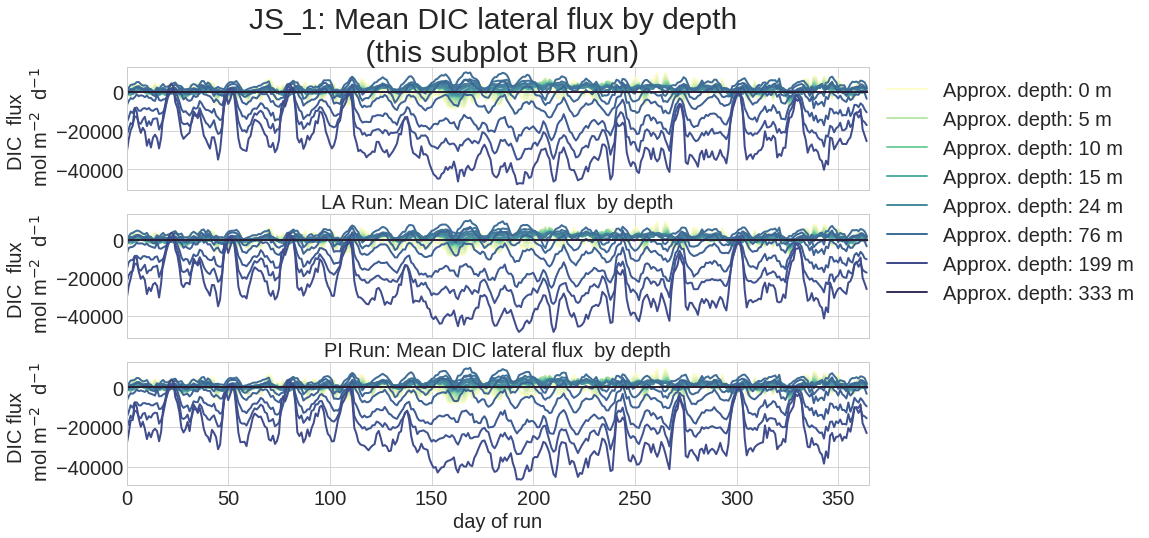

In [78]:
depth = mesh['gdept_1d'][:]
fig = plt.figure(figsize=(19*fact,11*fact))
days_in = np.arange(0,365,1)
fs = 20

#BR
ax = fig.add_subplot(3,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('DIC  flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('JS_1: Mean DIC lateral flux by depth \n (this subplot BR run)', fontsize = 30 )
plt.yticks(fontsize = fs)

#LA
ax = fig.add_subplot(3,1,2)
for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('DIC  flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
plt.title('LA Run: Mean DIC lateral flux  by depth', fontsize = fs )
plt.yticks(fontsize = fs)

#PI
ax = fig.add_subplot(3,1,3)
for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
plt.xlim([0,365])
ax.set_ylabel('DIC flux \n mol m$^{-2}$  d$^{-1}$', fontsize = fs)
plt.title('PI Run: Mean DIC lateral flux  by depth', fontsize = fs )
plt.xlabel('day of run', fontsize = fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
#plt.tight_layout()


Text(0.5, 1.0, 'BR Run - PI Run : Mean DIC lateral flux difference, by depth')

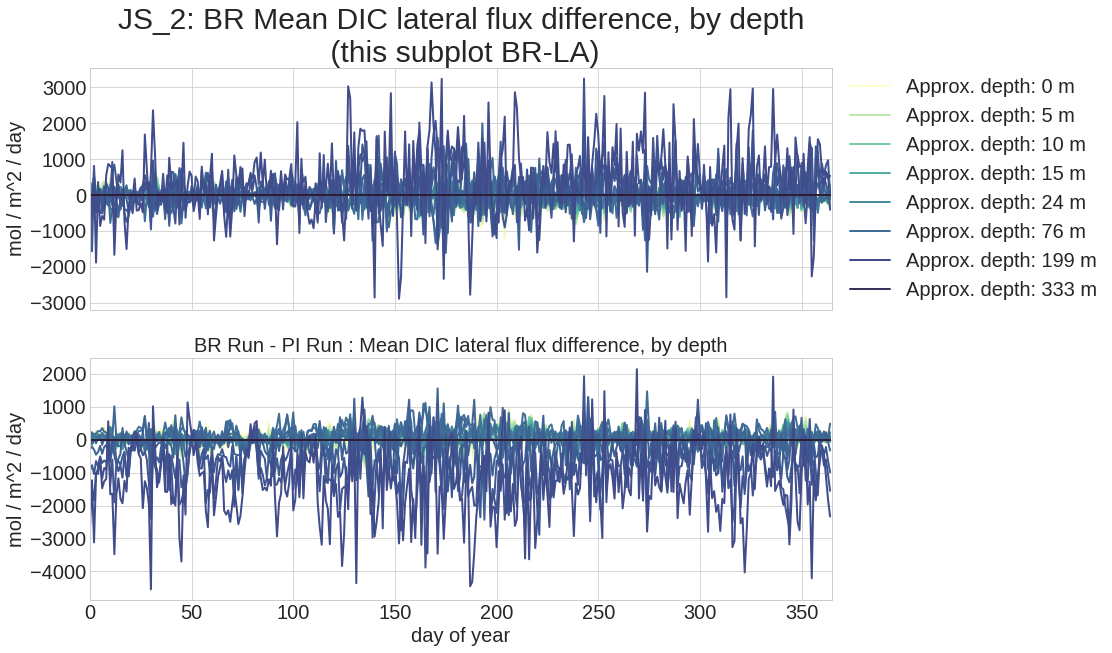

In [79]:
ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

for i in range(0,40):
    zdepth = (depth[0,i])
    if i%5 !=0: 
        ax.plot(days_in,BR2_var[i,:]-LA3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR2_var[i,:]-LA3_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365])
plt.yticks(fontsize = fs)
ax.set_xticklabels([])
ax.set_ylabel('mol / m^2 / day', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('JS_2: BR Mean DIC lateral flux difference, by depth\
\n (this subplot BR-LA)', fontsize = 30 )

#LA
ax = fig.add_subplot(2,1,2)
for i in range(0,40):
    zdepth = (depth[0,i])
    ax.plot(days_in,BR2_var[i,:]-PI3_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365])
plt.yticks(fontsize = fs)
plt.xticks(fontsize = fs)
ax.set_xlabel('day of year', fontsize = fs)
ax.set_ylabel('mol / m^2 / day', fontsize = fs)
plt.title('BR Run - PI Run : Mean DIC lateral flux difference, by depth', fontsize = fs )


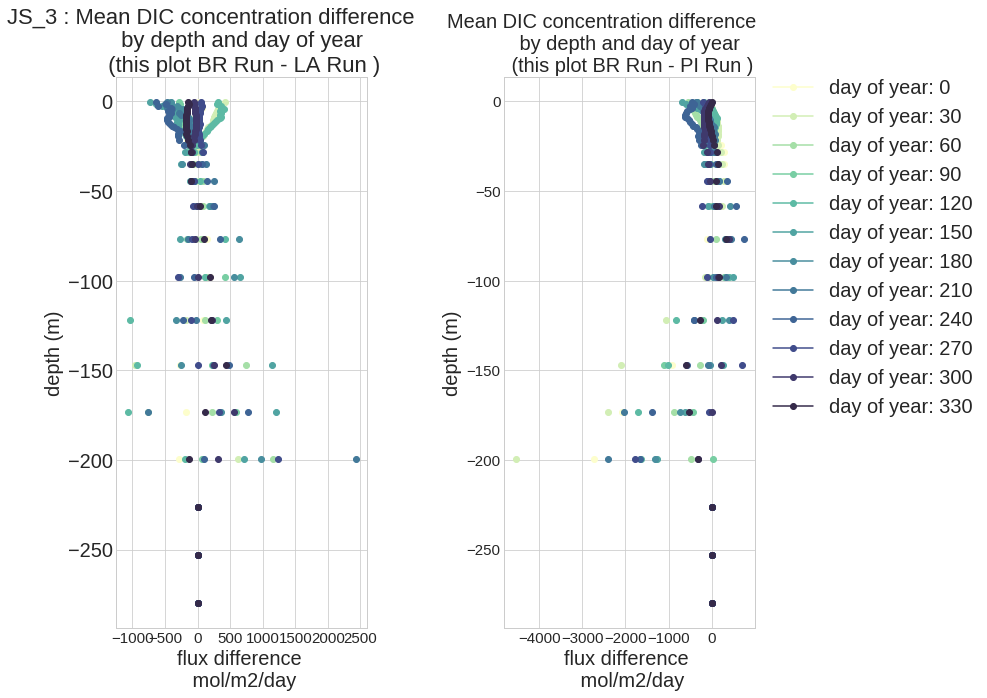

In [80]:
#####Plot
ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,2,1)

for d in range(0,12):
    for i in range(0,34):
        zdepth = (depth[0,i])  
        if i == 0:
            ax.plot((BR2_var[i,d*30]-LA3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax.plot((BR2_var[i,d*30]-LA3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

plt.xticks(fontsize=fs-5)
plt.yticks(fontsize=fs-5)
ax.set_ylabel('depth (m)', fontsize = fs)
ax.set_xlabel('flux difference \n mol/m2/day', fontsize = fs)
plt.title('JS_3 : Mean DIC concentration difference\
          \n by depth and day of year \n (this plot BR Run - LA Run )', fontsize = fs+2 )

plt.yticks(fontsize=fs)
#PI
ax = fig.add_subplot(1,2,2)

for d in range(0,12):
    for i in range(0,34):
        zdepth = (depth[0,i])  
        if i == 0:
            ax.plot((BR2_var[i,d*30]-PI3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax.plot((BR2_var[i,d*30]-PI3_var[i,d*30]),-zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

plt.xticks(fontsize=fs-5)
plt.yticks(fontsize=fs-5)
ax.set_xlabel('flux difference \n mol/m2/day', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
ax.set_ylabel('depth (m)', fontsize = fs)
plt.title('Mean DIC concentration difference\
          \n by depth and day of year \n (this plot BR Run - PI Run )', fontsize = fs)
plt.tight_layout()

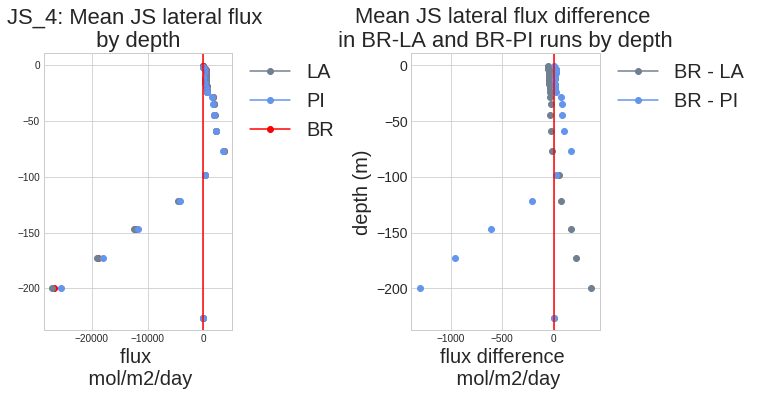

In [81]:




#####
ymin = -10
ymax = 60

fig = plt.figure(figsize=(15*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,2,1)
for i in range(0,32):
    zdepth = (depth[0,i])  
    if i == 0:
        ax.plot(np.mean((LA3_var[i,:])),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'LA')
        ax.plot(np.mean((PI3_var[i,:])), -zdepth, \
                color = 'cornflowerblue', marker = 'o', label = 'PI')
        ax.plot(np.mean((BR2_var[i,:])), -zdepth, \
                color = 'red', marker = 'o', label = 'BR')
    else:
        ax.plot(np.mean((BR2_var[i,:])),-zdepth, color = 'red', marker = 'o')
        ax.plot(np.mean((LA3_var[i,:])),-zdepth, color = 'slategrey', marker = 'o')
        ax.plot(np.mean((PI3_var[i,:])),-zdepth, color = 'cornflowerblue', marker = 'o')
        
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.axvline(x=0,color = 'r')
plt.title('JS_4: Mean JS lateral flux \n \
by depth ', fontsize = fs+2 )
ax.set_xlabel('flux \n mol/m2/day', fontsize = fs)

ax = fig.add_subplot(1,2,2)



for i in range(0,32):
    zdepth = (depth[0,i])  
    if i == 0:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, \
                color = 'slategrey', marker = 'o', label = 'BR - LA')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])), -zdepth, \
                color = 'cornflowerblue', marker = 'o', label = 'BR - PI')
    else:
        ax.plot(np.mean((BR2_var[i,:]-LA3_var[i,:])),-zdepth, color = 'slategrey', marker = 'o')
        ax.plot(np.mean((BR2_var[i,:]-PI3_var[i,:])),-zdepth, color = 'cornflowerblue', marker = 'o')

ax.set_xlabel('flux difference \n mol/m2/day', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Mean JS lateral flux difference \n in BR-LA and BR-PI runs \
by depth ', fontsize = fs+2 )
#plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel('depth (m)', fontsize = 20)
#plt.xlim(-400,400)
plt.axvline(x=0,color = 'r')
plt.tight_layout()




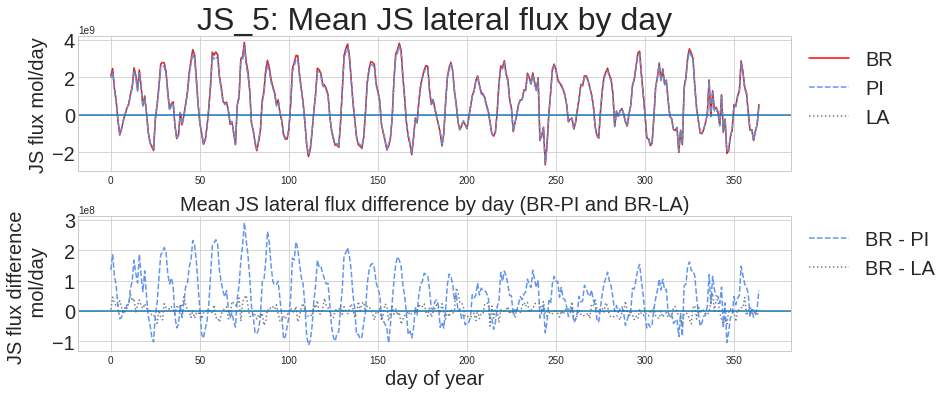

In [82]:
#####plot
#####
#####
BR2_fullcol_sum = np.sum(BR2_var_sum, axis = 0)
PI3_fullcol_sum = np.sum(PI3_var_sum, axis = 0)
LA3_fullcol_sum = np.sum(LA3_var_sum, axis = 0)

ymin = -10
ymax = 60

fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

ax.plot(BR2_fullcol_sum, color = 'red', label = 'BR')
ax.plot(PI3_fullcol_sum, color = 'cornflowerblue', linestyle = '--', label = 'PI')
ax.plot(LA3_fullcol_sum, color = 'slategrey', linestyle = ':', label = 'LA')
plt.title('JS_5: Mean JS lateral flux by day', fontsize = 32 )
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
ax.set_ylabel('JS flux mol/day', fontsize = fs)
plt.axhline(y=0)
plt.yticks(fontsize=fs)

plt.tight_layout()
ax = fig.add_subplot(2,1,2)

ax.plot(BR2_fullcol_sum-PI3_fullcol_sum, color = 'cornflowerblue', linestyle = '--', label = 'BR - PI')
ax.plot(BR2_fullcol_sum-LA3_fullcol_sum, color = 'slategrey', linestyle = ':', label = 'BR - LA')

ax.set_ylabel('var concentration difference', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Mean JS lateral flux difference by day (BR-PI and BR-LA)', fontsize = 20 )
plt.yticks(fontsize=fs)
ax.set_xlabel('day of year', fontsize = 20)
ax.set_ylabel('JS flux difference \n mol/day', fontsize = fs)
plt.tight_layout()
plt.axhline(y=0)

BR_JS_yr_flx = np.sum(BR2_fullcol_sum)
PI_JS_yr_flx = np.sum(PI3_fullcol_sum)
LA_JS_yr_flx = np.sum(LA3_fullcol_sum)

In [84]:
car_suffix = '_ASflux_mean_perday_alg2.pkl'
car_suffix_sum = '_ASflux_sum_perday_alg2.pkl'
BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR2_var_sum = pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA3_var_sum = pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))



No handles with labels found to put in legend.


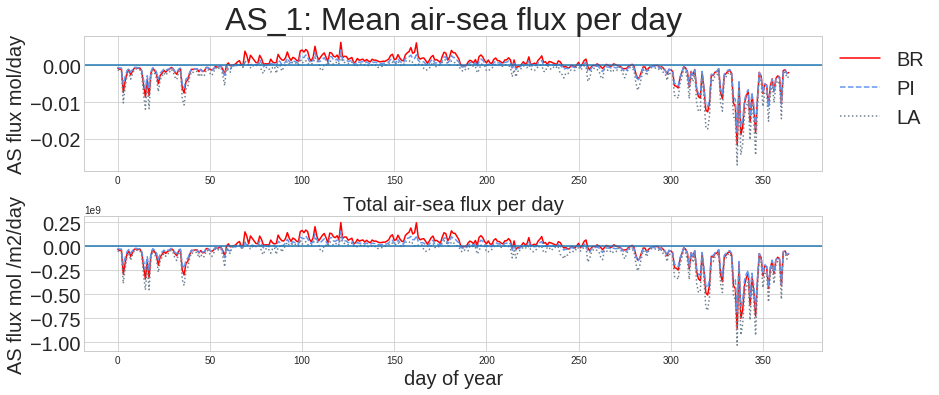

In [86]:
fig = plt.figure(figsize=(19*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(2,1,1)

ax.plot(BR2_var, color = 'red', label = 'BR')
ax.plot(PI3_var, color = 'cornflowerblue', linestyle = '--', label = 'PI')
ax.plot(LA3_var, color = 'slategrey', linestyle = ':', label = 'LA')
plt.title('AS_1: Mean air-sea flux per day', fontsize = 32 )
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
ax.set_ylabel('AS flux mol/day', fontsize = fs)
plt.axhline(y=0)
plt.yticks(fontsize=fs)

plt.tight_layout()
ax = fig.add_subplot(2,1,2)


ax.set_ylabel('var concentration difference', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('Total air-sea flux per day', fontsize = 20 )
ax.plot(BR2_var_sum, color = 'red', label = 'BR')
ax.plot(PI3_var_sum, color = 'cornflowerblue', linestyle = '--', label = 'PI')
ax.plot(LA3_var_sum, color = 'slategrey', linestyle = ':', label = 'LA')
plt.yticks(fontsize=fs)
ax.set_xlabel('day of year', fontsize = 20)
ax.set_ylabel('AS flux mol /m2/day', fontsize = fs)
plt.tight_layout()
plt.axhline(y=0)

BR_AS_yr_flx = np.sum(BR2_var)
PI_AS_yr_flx = np.sum(PI3_var)
LA_AS_yr_flx = np.sum(LA3_var)

# FS Flux summary plot

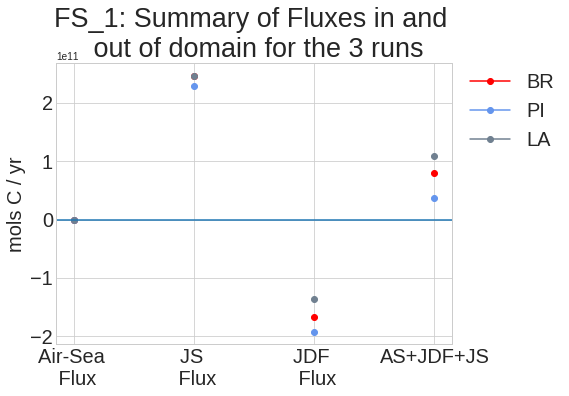

In [108]:
fig = plt.figure(figsize=(10*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,1,1)
#air-sea fluxes
ax.plot(0,BR_AS_yr_flx, color = 'red', marker = 'o', label = 'BR')
ax.plot(0,PI_AS_yr_flx, color = 'cornflowerblue', marker = 'o', label = 'PI')
ax.plot(0,LA_AS_yr_flx, color = 'slategrey', marker = 'o', label = 'LA')

#
ax.plot(1,BR_JS_yr_flx, color = 'red', marker = 'o',)
ax.plot(1,PI_JS_yr_flx, color = 'cornflowerblue', marker = 'o', )
ax.plot(1,LA_JS_yr_flx, color = 'slategrey', marker = 'o', )

ax.plot(2,BR_JDF_yr_flx, color = 'red', marker = 'o',)
ax.plot(2,PI_JDF_yr_flx, color = 'cornflowerblue', marker = 'o', )
ax.plot(2,LA_JDF_yr_flx, color = 'slategrey', marker = 'o', )

ax.plot(3,BR_JDF_yr_flx+BR_JS_yr_flx+BR_AS_yr_flx, color = 'red', marker = 'o',)
ax.plot(3,PI_JDF_yr_flx+PI_JS_yr_flx+PI_AS_yr_flx, color = 'cornflowerblue', marker = 'o', )
ax.plot(3,LA_JDF_yr_flx+LA_JS_yr_flx+LA_AS_yr_flx, color = 'slategrey', marker = 'o', )

#plt.title('AS_1: Mean air-sea flux per day', fontsize = 32 )
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
#ax.set_ylabel('AS flux mol/day', fontsize = fs)
plt.xticks([0,1,2,3])
ax.set_xticklabels(['Air-Sea \n Flux','JS \n Flux','JDF \n Flux','AS+JDF+JS'], fontsize = 20)
ax.axhline(y=0)
plt.yticks(fontsize=fs)
plt.ylabel('mols C / yr', fontsize = 20)
plt.title('FS_1: Summary of fluxes in and \n out of domain for the 3 runs', fontsize = 27)
plt.tight_layout()

Text(0.5, 1.0, 'FS_2: Summary of fluxes differences \n for the 3 runs')

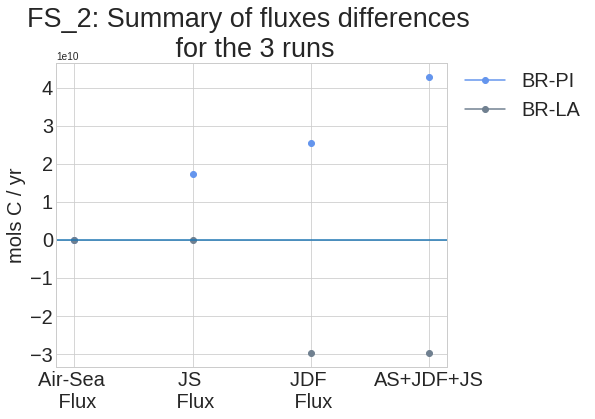

In [110]:
fig = plt.figure(figsize=(10*fact,8*fact))
days_in = np.arange(0,365,1)

#BR
ax = fig.add_subplot(1,1,1)
#air-sea fluxes
#ax.plot(0,BR_AS_yr_flx, color = 'red', marker = 'o', label = 'BR')
ax.plot(0,BR_AS_yr_flx-PI_AS_yr_flx, color = 'cornflowerblue', marker = 'o', label = 'BR-PI')
ax.plot(0,BR_AS_yr_flx-LA_AS_yr_flx, color = 'slategrey', marker = 'o', label = 'BR-LA')

#
#ax.plot(1,BR_JS_yr_flx, color = 'red', marker = 'o',)
ax.plot(1,BR_JS_yr_flx-PI_JS_yr_flx, color = 'cornflowerblue', marker = 'o', )
ax.plot(1,BR_JS_yr_flx-LA_JS_yr_flx, color = 'slategrey', marker = 'o', )

#ax.plot(2,BR_JDF_yr_flx, color = 'red', marker = 'o',)
ax.plot(2,BR_JDF_yr_flx-PI_JDF_yr_flx, color = 'cornflowerblue', marker = 'o', )
ax.plot(2,BR_JDF_yr_flx-LA_JDF_yr_flx, color = 'slategrey', marker = 'o', )

#ax.plot(3,(BR_JDF_yr_flx+BR_JS_yr_flx+BR_AS_yr_flx), color = 'red', marker = 'o',)
ax.plot(3,(BR_JDF_yr_flx+BR_JS_yr_flx+BR_AS_yr_flx)-(PI_JDF_yr_flx+PI_JS_yr_flx+PI_AS_yr_flx), color = 'cornflowerblue', marker = 'o', )
ax.plot(3,(BR_JDF_yr_flx+BR_JS_yr_flx+BR_AS_yr_flx)-(LA_JDF_yr_flx+LA_JS_yr_flx+LA_AS_yr_flx), color = 'slategrey', marker = 'o', )

#plt.title('AS_1: Mean air-sea flux per day', fontsize = 32 )
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
#ax.set_ylabel('AS flux mol/day', fontsize = fs)
plt.xticks([0,1,2,3])
ax.set_xticklabels(['Air-Sea \n Flux','JS \n Flux','JDF \n Flux','AS+JDF+JS'], fontsize = 20)
ax.axhline(y=0)
plt.yticks(fontsize=fs)
plt.ylabel('mols C / yr', fontsize = 20)
plt.title('FS_2: Summary of fluxes differences \n for the 3 runs', fontsize = 27)
#plt.tight_layout()